<a href="https://colab.research.google.com/github/est22/2021JanFeb_FR_Basic/blob/main/6%EC%A3%BC%EC%B0%A8%20%EC%8B%9C%EA%B0%81%ED%99%94_Web_scraping_and_then_visualize_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 절대 execute / run 버튼 누르지 마세요
## 웹에서 일별 시세 구하기
네이버 금융에 접속하여 한국거래소에 상장된 종목의 일별 시세 확인하기

https://finance.naver.com/item/sise.nhn?code=068270

셀트리온 일별 시세에서 '맨뒤 클릭' 후 마우스 오른쪽 버튼, copy link address 누르기.

https://finance.naver.com/item/sise_day.nhn?code=068270&page=385

## 뷰티풀 수프로 일별 시세 읽어오기
뷰티풀 수프 : html, xml 페이지로부터 데이터를 추출하는 파이썬 라이브러리로, 웹 스크레이퍼.

이름의 유래 : 구조적으로 잘못된 태그들로 구성된 HTML을 일컫는 용어인 태그 수프(Tag Soup)에서 유래. 

뷰티풀 수프는 내부적으로 HTML을 XML 형태의 파이썬 형태의 객체로 변환해서 처리하기 때문에 구조적으로 잘못된 HTML도 문제 없이 분석 가능.



In [ ]:
!pip install requests
!pip install beautifulsoup4

### 맨 뒤 페이지 숫자 구하기

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd

# 값을 못읽어와서 문제를 해결해줌.
url = "https://finance.naver.com/item/sise_day.nhn?code=068270&amp;page=1"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'}
res = requests.get(url, verify=True, headers=headers)


with urlopen(url) as doc:
    html = BeautifulSoup(res.text, 'lxml') # 파싱방법 : lxml
    pgrr = html.find('td', class_='pgRR') # pgRR은 pageRightRight을 의미
    #print(pgrr.a['href']) # /item/sise_day.nhn?code=068270&amp;page=1&page=383
    #print(pgrr.prettify()) # pgrr의 getText 속성값을 계층적으로 보기 좋게 출력
    #print(pgrr.text) # 맨뒤
    s = str(pgrr.a['href']).split('=')
    # s = str(pgrr.a['href'].split('='))
    # last_page = s[-2:-5]
    last_page = s[-1]
    print(last_page)



385


In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd

url = "https://finance.naver.com/item/sise_day.nhn?code=068270&amp;page=1"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'}
res = requests.get(url, verify=True, headers=headers)


with urlopen(url) as doc:
    html = BeautifulSoup(res.text, 'lxml') 
    pgrr = html.find('td', class_='pgRR') 
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]


df = pd.DataFrame()
sise_url = 'http://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    res = requests.get(page_url, verify=True, headers=headers)
    df = df.append(pd.read_html(res.text, encoding='euc-kr')[0])

df = df.dropna()
print(df)

            날짜        종가      전일비        시가        고가        저가        거래량
1   2021.02.05  341500.0      0.0  347500.0  355000.0  335000.0  1969629.0
2   2021.02.04  341500.0   6000.0  345000.0  349500.0  337500.0  1099579.0
3   2021.02.03  347500.0   8000.0  357500.0  359500.0  338000.0  1922464.0
4   2021.02.02  355500.0  15500.0  370000.0  370000.0  352500.0  2321590.0
5   2021.02.01  371000.0  47000.0  334000.0  383000.0  333000.0  6018601.0
..         ...       ...      ...       ...       ...       ...        ...
4   2005.07.25    5650.0     70.0    5500.0    5950.0    5500.0    61036.0
5   2005.07.22    5580.0    160.0    5850.0    5850.0    5530.0    69921.0
9   2005.07.21    5740.0    810.0    6450.0    6580.0    5730.0   182685.0
10  2005.07.20    6550.0   1150.0    7690.0    7690.0    6550.0   422688.0
11  2005.07.19    7700.0   2500.0    6700.0    7700.0    6510.0   499088.0

[3848 rows x 7 columns]


## OHLC 차트와 캔들 차트의 비교

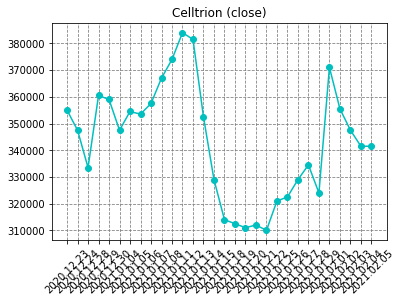

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import pandas as pd
from matplotlib import pyplot as plt

url = "https://finance.naver.com/item/sise_day.nhn?code=068270&amp;page=1"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'}
res = requests.get(url, verify=True, headers=headers)


with urlopen(url) as doc:
    html = BeautifulSoup(res.text, 'lxml') 
    pgrr = html.find('td', class_='pgRR') 
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]


df = pd.DataFrame()
sise_url = 'http://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    res = requests.get(page_url, verify=True, headers=headers)
    df = df.append(pd.read_html(res.text, encoding='euc-kr')[0])

# 셀트리온 종가 차트(here!)
df = df.dropna()
df = df.iloc[0:30] # 최근 데이터 30행만 사용
df = df.sort_values(by ='날짜') # 네이버 금융 데이터가 내림차순이라서 오름차순으로 변경

# 날짜, 종가 칼럼으로 차트 그리기
plt.title("Celltrion (close)")
plt.xticks(rotation = 45) # x축 레이블의 날짜가 겹쳐있어 보기 어려우므로 45도 회전하여 표시
plt.plot(df['날짜'], df['종가'], 'co-') # x축은 날짜 데이터로, y축은 종가 데이터로 출력한다. co는 좌표를 cyan 원으로, -는 각 좌표를 실선으로 연결해서 표시하라는 의미
plt.grid(color = 'gray', linestyle = '--')
plt.show()

## 셀트리온 캔들 차트

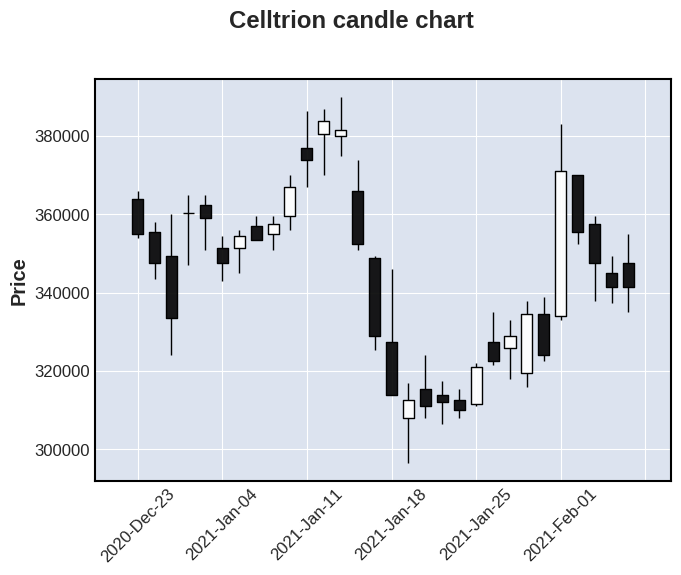

In [17]:
#!pip install mplfinance
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import mplfinance as mpf
import requests

url = "https://finance.naver.com/item/sise_day.nhn?code=068270&amp;page=1"
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_1_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'}
res = requests.get(url, verify=True, headers=headers)

with urlopen(url) as doc:
    html = BeautifulSoup(res.text, 'lxml') 
    pgrr = html.find('td', class_='pgRR') 
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]

df = pd.DataFrame()
sise_url = 'http://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    res = requests.get(page_url, verify=True, headers=headers)
    df = df.append(pd.read_html(res.text, encoding='euc-kr')[0])

df = df.dropna()
df = df.iloc[0:30]
df = df.rename(columns = {'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by ='Date')
df.index = pd.to_datetime(df.Date) #  Date 칼럼을 DateTimeIndex형으로 변경 후 인덱스로 설정
df = df[['Open','High','Low','Close','Volume']]

# mpl finance로 캔들 차트 그리기
mpf.plot(df, title = 'Celltrion candle chart', type = 'candle') # type = 'ohlc' is default
plt.show()

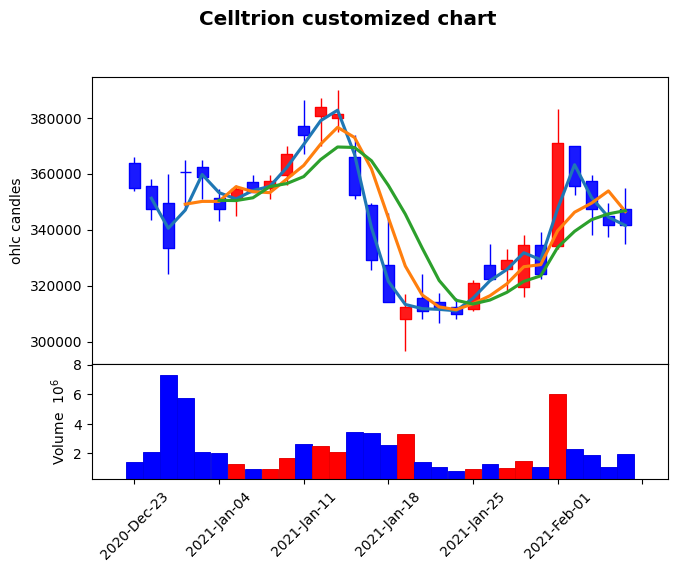

In [18]:
kwargs = dict(title = 'Celltrion customized chart', type = 'candle', mav = (2,4,6), volume = True, ylabel = 'ohlc candles')
mc = mpf.make_marketcolors(up = 'r', down = 'b', inherit  = True)
s = mpf.make_mpf_style(marketcolors = mc)
mpf.plot(df, **kwargs, style = s)
plt.show()